<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Ancho y Frecuencia Constantes </font> </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


In [3]:
N=10**4
normal = np.random.normal(size=(N,1))
gamma = np.random.gamma(shape=4, size=(N,1))

x = 0.5*normal + 0.5*gamma
y = x**2 + 1 + np.random.uniform(-5,5,(N,1))

df = pd.DataFrame(np.concatenate((x,y), axis=1), columns=('x','y'))

In [4]:
df.head()

,x,y
0,1.642998,8.635883
1,1.545542,7.444181
2,2.415723,3.452051
3,0.885640,-2.019720
4,3.829880,19.280329


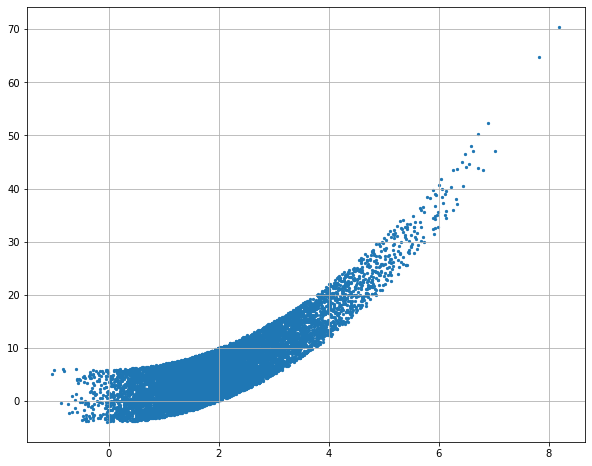

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(df['x'],df['y'], s=5)
plt.grid()
plt.show()

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

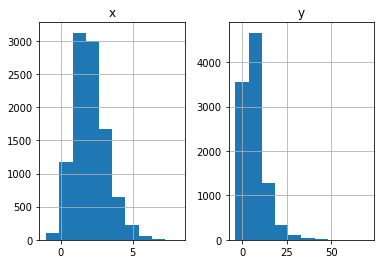

In [6]:
df.hist()

In [9]:
#@title Discretización por ancho constante
bins = 50
ancho = (df['x'].max() - df['x'].min())/bins
intervalos = np.linspace(df.x.min(), df.x.max(), bins+1)
ancho, intervalos

(0.18448714202826572,
 array([-1.02719944, -0.8427123 , -0.65822516, -0.47373802, -0.28925088,
        -0.10476373,  0.07972341,  0.26421055,  0.44869769,  0.63318483,
         0.81767198,  1.00215912,  1.18664626,  1.3711334 ,  1.55562054,
         1.74010769,  1.92459483,  2.10908197,  2.29356911,  2.47805625,
         2.6625434 ,  2.84703054,  3.03151768,  3.21600482,  3.40049196,
         3.58497911,  3.76946625,  3.95395339,  4.13844053,  4.32292767,
         4.50741482,  4.69190196,  4.8763891 ,  5.06087624,  5.24536338,
         5.42985053,  5.61433767,  5.79882481,  5.98331195,  6.16779909,
         6.35228624,  6.53677338,  6.72126052,  6.90574766,  7.0902348 ,
         7.27472195,  7.45920909,  7.64369623,  7.82818337,  8.01267051,
         8.19715766]))

In [10]:
pd.cut?

In [11]:
# Discretización
# Se obtienen valores distribuidos a lo largo del rango de 'x' de forma que le asignamos la misma importancia
df['ancho_x'] = pd.cut(df['x'], intervalos, include_lowest=True)
df.head()

,x,y,ancho_x
0,1.642998,8.635883,"(1.556, 1.74]"
1,1.545542,7.444181,"(1.371, 1.556]"
2,2.415723,3.452051,"(2.294, 2.478]"
3,0.885640,-2.019720,"(0.818, 1.002]"
4,3.829880,19.280329,"(3.769, 3.954]"


In [12]:
df['ancho_x'].value_counts()

(1.371, 1.556]                   705
(1.925, 2.109]                   689
(1.556, 1.74]                    684
(1.74, 1.925]                    682
(1.187, 1.371]                   646
(2.109, 2.294]                   635
(1.002, 1.187]                   594
(2.294, 2.478]                   515
(0.818, 1.002]                   495
(2.478, 2.663]                   474
(2.847, 3.032]                   424
(2.663, 2.847]                   420
(0.633, 0.818]                   391
(0.449, 0.633]                   316
(3.032, 3.216]                   315
(3.216, 3.4]                     276
(3.4, 3.585]                     238
(0.264, 0.449]                   224
(3.585, 3.769]                   183
(0.0797, 0.264]                  155
(3.769, 3.954]                   155
(3.954, 4.138]                   118
(4.138, 4.323]                   105
(-0.105, 0.0797]                  91
(4.323, 4.507]                    81
(4.692, 4.876]                    65
(4.507, 4.692]                    59
(

<AxesSubplot:>

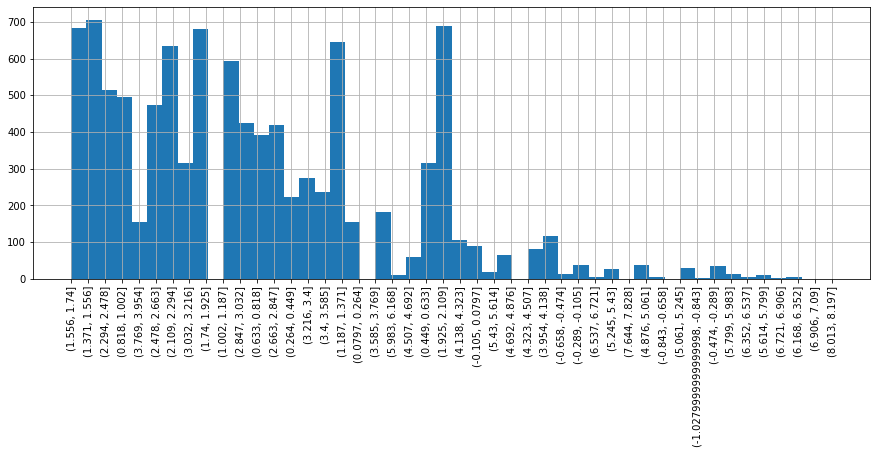

In [13]:
df['ancho_x'].astype('str').hist(figsize=(15,5), bins=50, xrot=90)

In [14]:
x = df.groupby('ancho_x')['x'].mean()
y = df.groupby('ancho_x')['y'].mean()

In [15]:
x

ancho_x
(-1.0279999999999998, -0.843]   -0.958322
(-0.843, -0.658]                -0.740552
(-0.658, -0.474]                -0.553943
(-0.474, -0.289]                -0.373787
(-0.289, -0.105]                -0.207464
(-0.105, 0.0797]                 0.003461
(0.0797, 0.264]                  0.183891
(0.264, 0.449]                   0.363854
(0.449, 0.633]                   0.549252
(0.633, 0.818]                   0.729188
(0.818, 1.002]                   0.914457
(1.002, 1.187]                   1.099315
(1.187, 1.371]                   1.277364
(1.371, 1.556]                   1.466136
(1.556, 1.74]                    1.645725
(1.74, 1.925]                    1.830947
(1.925, 2.109]                   2.012347
(2.109, 2.294]                   2.202557
(2.294, 2.478]                   2.384690
(2.478, 2.663]                   2.568684
(2.663, 2.847]                   2.752359
(2.847, 3.032]                   2.936989
(3.032, 3.216]                   3.124674
(3.216, 3.4]              

In [16]:
y

ancho_x
(-1.0279999999999998, -0.843]     3.538190
(-0.843, -0.658]                  1.285669
(-0.658, -0.474]                  1.459171
(-0.474, -0.289]                  0.505830
(-0.289, -0.105]                  1.542169
(-0.105, 0.0797]                  0.925932
(0.0797, 0.264]                   1.077524
(0.264, 0.449]                    1.265842
(0.449, 0.633]                    1.082761
(0.633, 0.818]                    1.571901
(0.818, 1.002]                    1.885011
(1.002, 1.187]                    2.157974
(1.187, 1.371]                    2.695080
(1.371, 1.556]                    2.987054
(1.556, 1.74]                     3.740193
(1.74, 1.925]                     4.385687
(1.925, 2.109]                    4.970827
(2.109, 2.294]                    5.667215
(2.294, 2.478]                    6.790552
(2.478, 2.663]                    7.711674
(2.663, 2.847]                    8.440444
(2.847, 3.032]                    9.633079
(3.032, 3.216]                   10.854886
(3.

In [17]:
# La forma más simple de imputar los valores (eliminando)
x=x.dropna()
y=y.dropna()

In [18]:
# Aplicando otro tipoo de imputación
x = df.groupby('ancho_x')['x'].mean()
y = df.groupby('ancho_x')['y'].mean()

In [20]:
x.isna().sum(), y.isna().sum()

(4, 4)

In [22]:
while(x.isna().sum()>0):
    nans_x = np.where(x.isna())
    for idx in nans_x:
        x.iloc[idx] = x.iloc[idx-1]
        y.iloc[idx] = y.iloc[idx-1]

x.isna().sum()

0

In [23]:
x

ancho_x
(-1.0279999999999998, -0.843]   -0.958322
(-0.843, -0.658]                -0.740552
(-0.658, -0.474]                -0.553943
(-0.474, -0.289]                -0.373787
(-0.289, -0.105]                -0.207464
(-0.105, 0.0797]                 0.003461
(0.0797, 0.264]                  0.183891
(0.264, 0.449]                   0.363854
(0.449, 0.633]                   0.549252
(0.633, 0.818]                   0.729188
(0.818, 1.002]                   0.914457
(1.002, 1.187]                   1.099315
(1.187, 1.371]                   1.277364
(1.371, 1.556]                   1.466136
(1.556, 1.74]                    1.645725
(1.74, 1.925]                    1.830947
(1.925, 2.109]                   2.012347
(2.109, 2.294]                   2.202557
(2.294, 2.478]                   2.384690
(2.478, 2.663]                   2.568684
(2.663, 2.847]                   2.752359
(2.847, 3.032]                   2.936989
(3.032, 3.216]                   3.124674
(3.216, 3.4]              

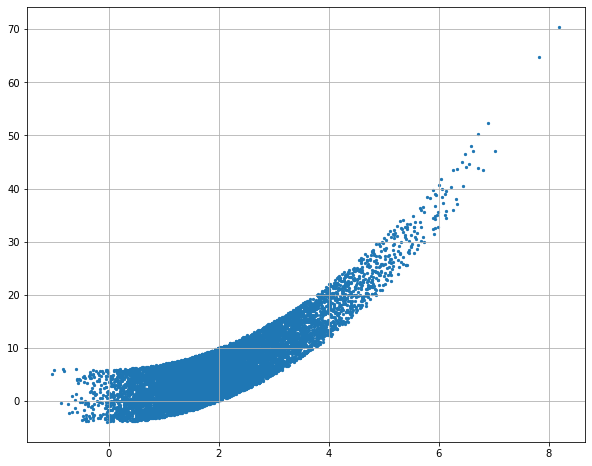

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(df['x'],df['y'], s=5)
plt.grid()
plt.show()

In [26]:
#@title Regresión
#Regresión lineal con los valores discretizados
lin_ancho_x=LinearRegression()
lin_ancho_x.fit(x.values.reshape(-1,1), y)
predict_ancho_x = lin_ancho_x.predict(df[['x']])

In [27]:
# Regresión Lineal de los valores originales
lin_SD = LinearRegression()
lin_SD.fit(df[['x']], df['y'])
predict_SD = lin_SD.predict(df[['x']])

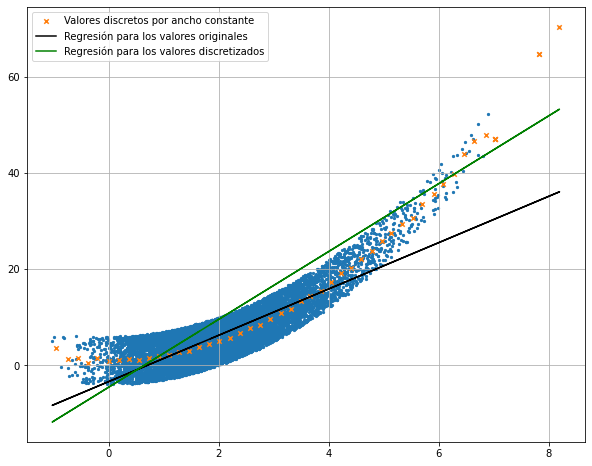

In [29]:
# Gráfico
plt.figure(figsize=(10,8))
plt.scatter(df['x'],df['y'], s=5)
plt.scatter(x,y, marker='x', s=20, label='Valores discretos por ancho constante')
plt.plot(df.x,predict_SD, 'k', label='Regresión para los valores originales')
plt.plot(df.x,predict_ancho_x, 'g', label='Regresión para los valores discretizados')
plt.grid()
plt.legend()
plt.show()

## Discretización con Frecuencia Constante

In [30]:
#@title Discretización con frecuencia constante
# Usamos la misma cantidad de contenedores
bins

50

In [31]:
# Cantidad de observaciones
df.x.shape[0]

10000

In [32]:
# Cada contenedor tendrá 200 observaciones
df.x.shape[0]/bins

200.0

In [33]:
ancho

0.18448714202826572

In [35]:
pd.qcut?

In [37]:
# Discretización
df['freq_x'], intervalos_freq = pd.qcut(df.x,bins, retbins=True)


In [38]:
intervalos

array([-1.02719944, -0.8427123 , -0.65822516, -0.47373802, -0.28925088,
       -0.10476373,  0.07972341,  0.26421055,  0.44869769,  0.63318483,
        0.81767198,  1.00215912,  1.18664626,  1.3711334 ,  1.55562054,
        1.74010769,  1.92459483,  2.10908197,  2.29356911,  2.47805625,
        2.6625434 ,  2.84703054,  3.03151768,  3.21600482,  3.40049196,
        3.58497911,  3.76946625,  3.95395339,  4.13844053,  4.32292767,
        4.50741482,  4.69190196,  4.8763891 ,  5.06087624,  5.24536338,
        5.42985053,  5.61433767,  5.79882481,  5.98331195,  6.16779909,
        6.35228624,  6.53677338,  6.72126052,  6.90574766,  7.0902348 ,
        7.27472195,  7.45920909,  7.64369623,  7.82818337,  8.01267051,
        8.19715766])

In [39]:
df.head()

,x,y,ancho_x,freq_x
0,1.642998,8.635883,"(1.556, 1.74]","(1.634, 1.685]"
1,1.545542,7.444181,"(1.371, 1.556]","(1.526, 1.577]"
2,2.415723,3.452051,"(2.294, 2.478]","(2.363, 2.433]"
3,0.885640,-2.019720,"(0.818, 1.002]","(0.871, 0.946]"
4,3.829880,19.280329,"(3.769, 3.954]","(3.716, 3.946]"


In [40]:
df['freq_x'].value_counts()

(-1.0279999999999998, 0.0966]    200
(2.665, 2.753]                   200
(2.003, 2.058]                   200
(2.058, 2.119]                   200
(2.119, 2.181]                   200
(2.181, 2.237]                   200
(2.237, 2.292]                   200
(2.292, 2.363]                   200
(2.363, 2.433]                   200
(2.433, 2.507]                   200
(2.507, 2.589]                   200
(2.589, 2.665]                   200
(2.753, 2.841]                   200
(0.0966, 0.321]                  200
(2.841, 2.926]                   200
(2.926, 3.016]                   200
(3.016, 3.134]                   200
(3.134, 3.252]                   200
(3.252, 3.385]                   200
(3.385, 3.532]                   200
(3.532, 3.716]                   200
(3.716, 3.946]                   200
(3.946, 4.274]                   200
(4.274, 4.787]                   200
(1.955, 2.003]                   200
(1.905, 1.955]                   200
(1.847, 1.905]                   200
(

In [41]:
xF= df.groupby('freq_x')['x'].mean()
yF = df.groupby('freq_x')['y'].mean()

In [43]:
xF.isna().sum(),yF.isna().sum()

(0, 0)

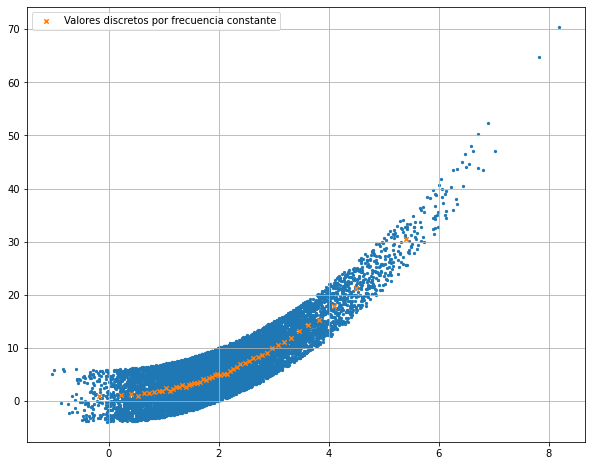

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(df['x'],df['y'], s=5)
plt.scatter(xF,yF, marker='x', s=20, label='Valores discretos por frecuencia constante')
plt.grid()
plt.legend()
plt.show()

In [46]:
#@title Regresión
lin_freq_x = LinearRegression()
lin_freq_x.fit(xF.values.reshape(-1,1),yF)
predict_freq_x = lin_freq_x.predict(df[['x']].values)

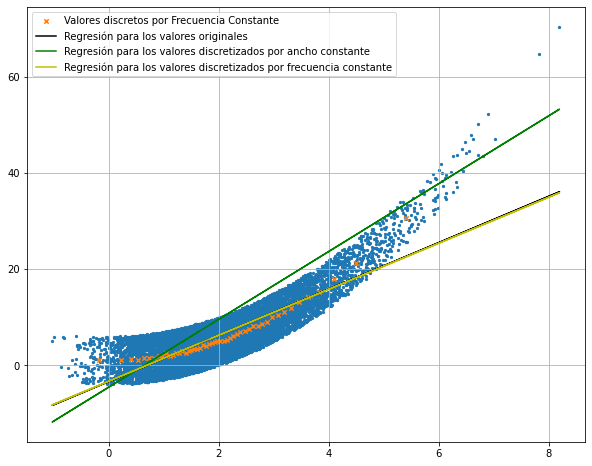

In [49]:
# Gráfico
plt.figure(figsize=(10,8))
plt.scatter(df['x'],df['y'], s=5)
plt.scatter(xF,yF, marker='x', s=20, label='Valores discretos por Frecuencia Constante')
plt.plot(df.x,predict_SD, 'k', label='Regresión para los valores originales')
plt.plot(df.x,predict_ancho_x, 'g', label='Regresión para los valores discretizados por ancho constante')
plt.plot(df.x,predict_freq_x, 'y', label='Regresión para los valores discretizados por frecuencia constante')
plt.grid()
plt.legend()
plt.show()

In [50]:
# Modelo con datos sin discretizar
lin_SD.coef_, lin_SD.intercept_

(array([4.81895798]), -3.3933393509899883)

In [51]:
# Modelo con datos discretizados
lin_freq_x.coef_, lin_freq_x.intercept_

(array([4.78571535]), -3.3258756283440736)

# Modelos conseguidos
Modelo con datos sin discretizar
$$
y=4.807x-3.388
$$
Modelo con datos discretizados con frecuencia constante
$$
y=4.772x-3.319
$$

In [52]:
lin_SD.score(df[['x']],df['y']),lin_freq_x.score(df[['x']].values,df['y'])

(0.7123602692853019, 0.7123263705136174)

### Ejemplo con un dataset

In [53]:
titanic_df = pd.read_csv("Data/titanic.csv")

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


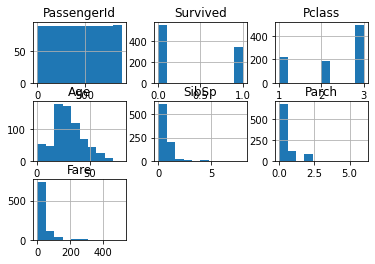

In [56]:
titanic_df.hist();

<AxesSubplot:>

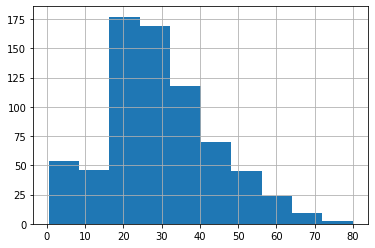

In [57]:
titanic_df['Age'].hist()

In [59]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
titanic_df['Age'].isna().sum()

177

In [62]:
def cut_age(df, cut_values, label_names):
    df['Age_labels'] = pd.cut(df['Age'], bins=cut_values, labels=label_names)
    return df

In [63]:
titanic_df['Age'].min(), titanic_df['Age'].max()

(0.42, 80.0)

In [65]:
cut_values = [0, 3, 12, 19, 35, 60, 80]
label_names = ['Infantes', 'Niños', 'Adolecentes', 'Adultos', 'Adultos medios', 'Señores']

titanic_df = cut_age(titanic_df, cut_values, label_names)

In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultos
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultos medios
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adultos
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adultos


In [67]:
titanic_df['Age_labels'].value_counts()

Adultos           333
Adultos medios    195
Adolecentes        95
Niños              39
Infantes           30
Señores            22
Name: Age_labels, dtype: int64

In [68]:
import seaborn as sns

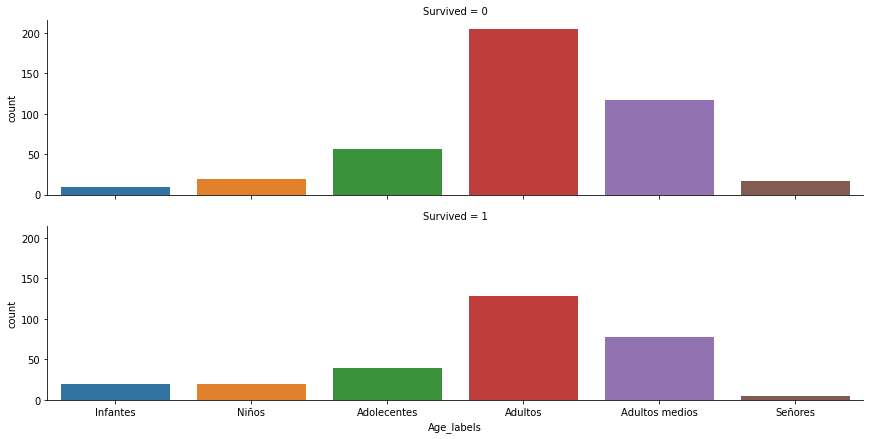

In [69]:
sns.catplot(x='Age_labels', row='Survived', kind='count', height =3, aspect=4, data=titanic_df)

In [70]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultos
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultos medios
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultos
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adultos
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adultos


<AxesSubplot:>

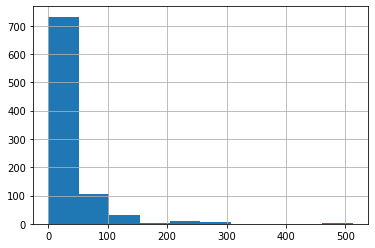

In [71]:
titanic_df['Fare'].hist()

In [72]:
def qcut_fare(df, q, labels):
    df['Fare_labels'] = pd.qcut(df['Fare'], q, labels=labels)
    return df

In [73]:
labels=['range1', 'range2', 'range3', 'range4']
titanic_df = qcut_fare(titanic_df, q=4, labels = labels)

In [74]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels,Fare_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultos,range1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultos medios,range4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultos,range2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adultos,range4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adultos,range2


In [75]:
titanic_df['Fare_labels'].value_counts()

range2    224
range1    223
range3    222
range4    222
Name: Fare_labels, dtype: int64

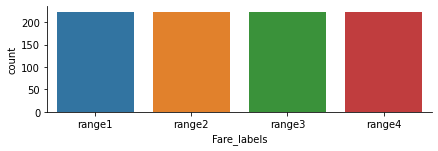

In [76]:
sns.catplot(x='Fare_labels', data=titanic_df, kind='count', height=2, aspect=3)